# Facial Alignment Exercise

Make sure you're using the python from your virtual environment.

In [1]:
import sys
sys.executable

'/Users/loki/Documents/Github/facial-alignment-exercise/venv/bin/python'

Import libraries that we'll need.

In [2]:
%matplotlib notebook

import cv2 as cv
import dlib
import matplotlib.pyplot as plt
import numpy as np
import openface

Create detector and predictor.

In [3]:
MODEL_PATH = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(MODEL_PATH)
aligner = openface.AlignDlib(MODEL_PATH)

Read images that we'll use for this exercise.

In [4]:
ori_img = cv.imread("imgs/img1.jpg")
ori_img = cv.cvtColor(ori_img, cv.COLOR_BGR2RGB)

Create two functions that we'll use for getting facial landmarks and annotate images.

In [5]:
def get_landmarks(img, faces):
    """ Detect frontal face and return a list of facial landmarks """
    return np.matrix([[p.x, p.y] for p in predictor(img, faces).parts()])

def draw(img, landmarks):
    """ Take a list of landmarks and return an annotated image """
    res = img.copy()
    for i, mark in enumerate(landmarks):
        cv.circle(res, (mark[0, 0], mark[0, 1]), 3, color=(0, 0, 255))
    return res

Detect faces in the image and get landmarks.

In [6]:
faces = detector(ori_img, 1)   # use HOG detector to find faces
landmarks = get_landmarks(ori_img, faces[0])   # use the first face only to get landmarks
res = draw(ori_img, landmarks)   # draw landmarks on the image

Let's see the landmarks on the original image.

<IPython.core.display.Javascript object>


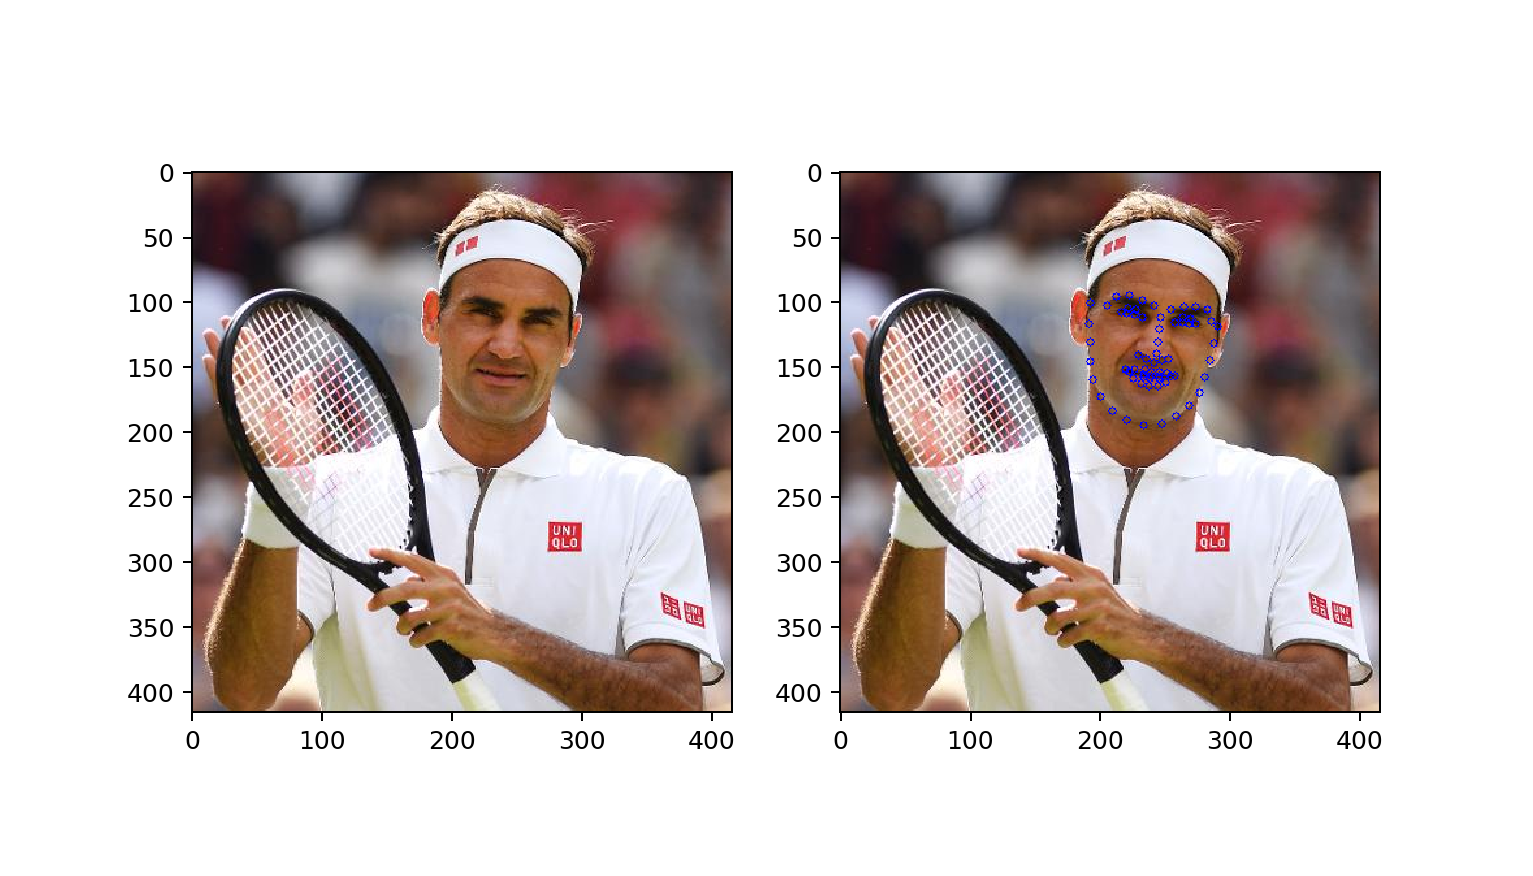

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(ori_img)
ax2.imshow(res)
fig.show()

Now let's transform the face so it's centered and scaled.

In [8]:
aligned_img = aligner.align(534, ori_img, faces[0],
                            landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
print(aligned_img.shape)

(534, 534, 3)


<IPython.core.display.Javascript object>


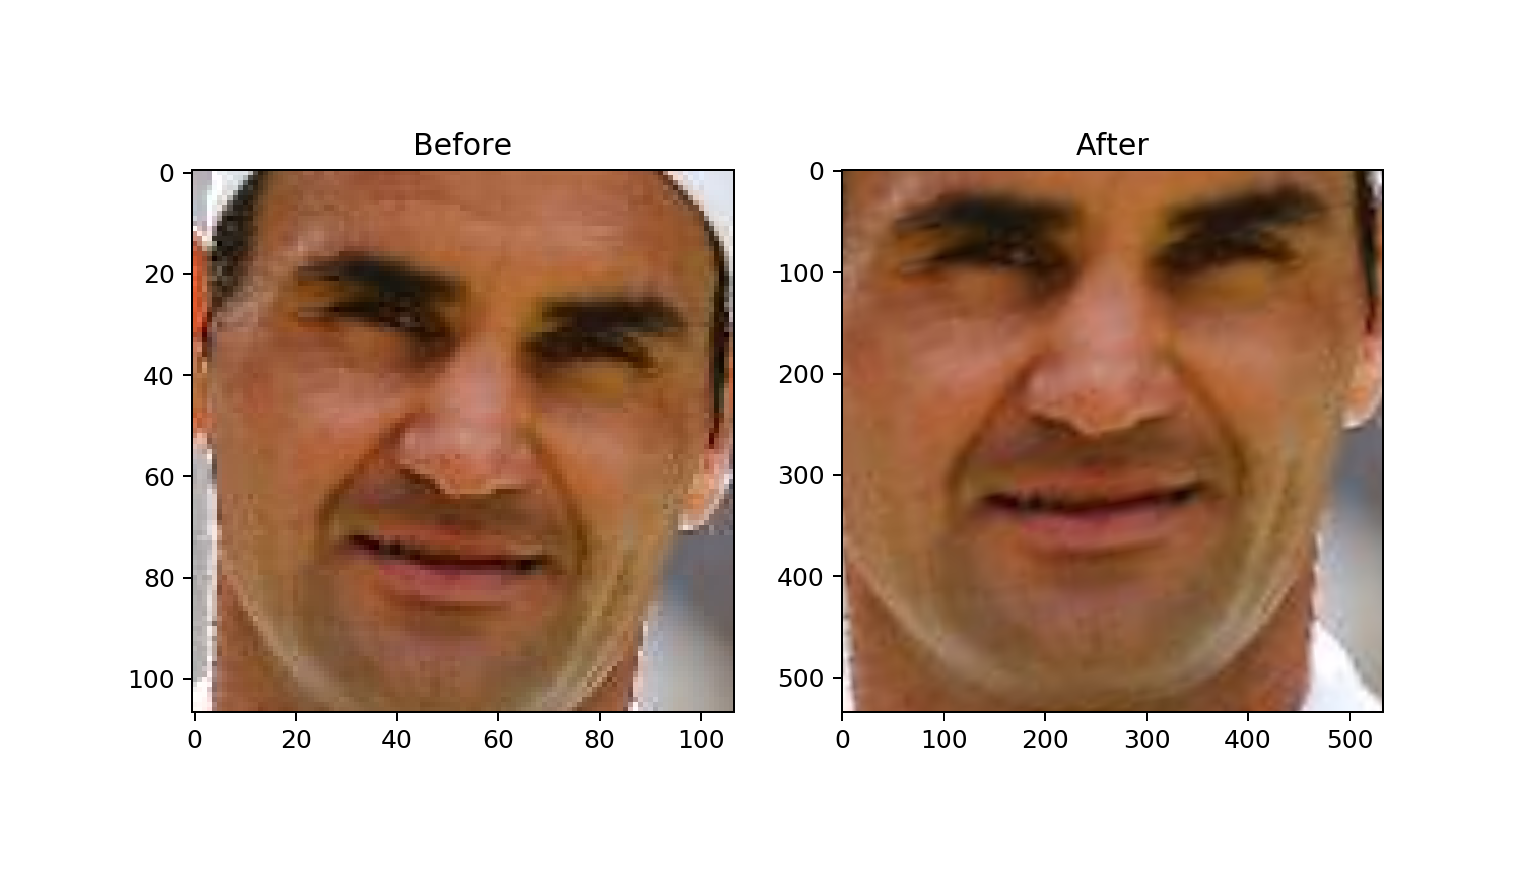

In [9]:
fig, (ax_1, ax_2) = plt.subplots(1, 2)
ax_1.imshow(ori_img[faces[0].top():faces[0].bottom(), faces[0].left():faces[0].right()])
ax_1.set_title('Before')
ax_2.imshow(aligned_img)
ax_2.set_title('After')
fig.show()